## Train & Test Petrol Price Model : 2 Features

In [1]:
import pandas as pd 
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)
data.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


#### Relationship between Oil Price in Rand vs BFP
Microsoft Way

In [18]:
import statsmodels.formula.api as smf
import graphing # custom graphing code. See our GitHub repo for details

# First, we define our formula using a special syntax
# This says that core temperature is explained by age
formula = "Petrol ~ Crude_Rands"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = data).fit()

# Show a graph of the result
graphing.scatter_2D(data,    label_x="Crude_Rands", 
                                label_y="Petrol",
                                trendline=lambda x: model.params[1] * x + model.params[0]
                                )

Plotly Way

In [3]:
import plotly.express as px

fig = px.scatter(data, x="Crude_Rands", y="Petrol", trendline="ols", trendline_color_override='red',width=800, height=400)
fig.show()

Seaborn Way

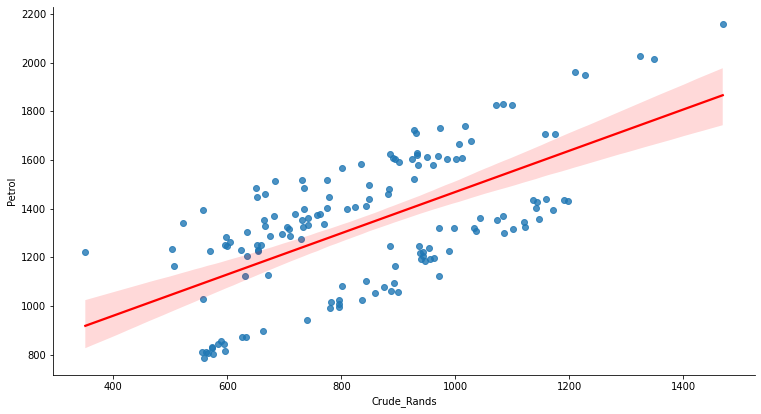

In [4]:
import seaborn as sns 
g = sns.lmplot(data = data ,x='Crude_Rands', y='Petrol', line_kws={'color': 'red'})
g.figure.set_size_inches(12,6)


### Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split


# Obtain the label and feature from the original data
dataset = data[['Petrol', 'Crude_Rands']]

# Split the dataset in an 80/20 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(dataset, train_size=0.8, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
     Petrol  Crude_Rands
46   1298.6  1085.220224
106  1707.8  1175.798580
104  1607.8  1011.006930
140  1827.8  1070.825000
52   1426.7  1143.493656
(117, 2)
Test
     Petrol  Crude_Rands
7     816.8   596.056076
62   1126.6   671.350770
20   1018.4   781.219530
67   1325.7   704.054016
132  1486.3   734.998800
(30, 2)


In [6]:
# concatenate training and test so they can be graphed
plot_set = pd.concat([train,test])
plot_set["Dataset"] = ["train"] * len(train) + ["test"] * len(test)

# Create graph
graphing.scatter_2D(plot_set, "Crude_Rands", "Petrol",  "Dataset", trendline = lambda x: model.params[1] * x + model.params[0])

Plotly Way

In [7]:
import plotly.express as px

fig = px.scatter(plot_set, x="Crude_Rands", y="Petrol", symbol="Dataset", color="Dataset", trendline="ols", trendline_scope="overall", width=800, height=400)
fig.show()

### Training Set

In [8]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "Petrol ~ Crude_Rands"

# Create and train the model
model = smf.ols(formula = formula, data = train).fit()

# Graph the result against the data
graphing.scatter_2D(train, "Crude_Rands", "Petrol", trendline = lambda x: model.params[1] * x + model.params[0])

Plotly Way

In [9]:
fig = px.scatter(train, x="Crude_Rands", y="Petrol", trendline="ols", trendline_color_override='red', width=800, height=400)
fig.show()

Seborn Way

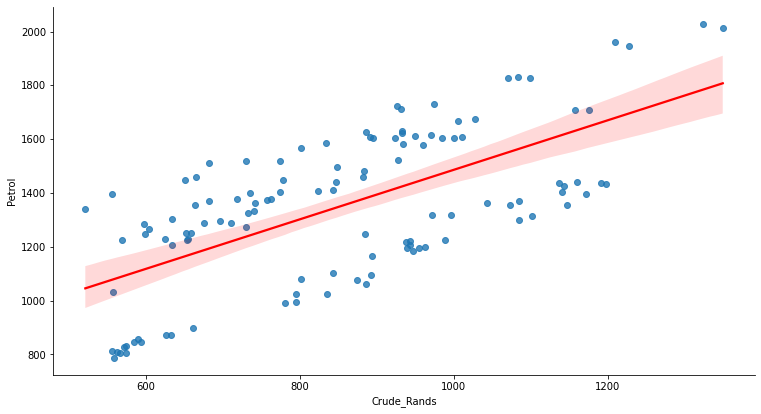

In [10]:
g = sns.lmplot(data = train ,x='Crude_Rands', y='Petrol', line_kws={'color': 'red'})
g.figure.set_size_inches(12,6)


In [11]:
# We use the in-buit sklearn function to calculate the MSE
correct_labels = train['Petrol']
predicted = model.predict(train['Crude_Rands'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 44647.490852 


### Test Set

In [12]:
graphing.scatter_2D(test, "Crude_Rands", "Petrol", trendline = lambda x: model.params[1] * x + model.params[0])

Plotly Way

In [13]:
fig = px.scatter(test, x="Crude_Rands", y="Petrol", trendline="ols", trendline_color_override='red', width=800, height=400)
fig.show()

In [14]:
correct_labels = test['Petrol']
predicted = model.predict(test['Crude_Rands'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 50967.707424 
